<a href="https://colab.research.google.com/github/Falskim/datamining-decisiontree-diabetes/blob/main/DecisionTreeDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Preparing Dataset



> Load dataset file



In [2]:
url = "https://raw.githubusercontent.com/Falskim/datamining-decisiontree-diabetes/main/diabetes_data_upload.csv"
df = pd.read_csv(url)

> Check dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


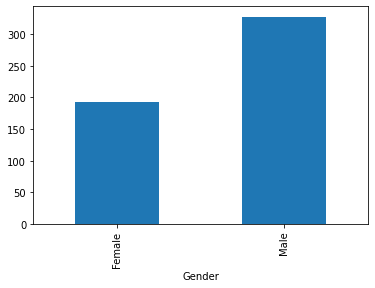

In [5]:
df.groupby("Gender").size().plot(kind='bar')

> Map dataset attributes variable from **string** to **number**

In [6]:
gender_mapping_values = {"Male": 1, "Female": 0}
df.replace({"Gender":gender_mapping_values}, inplace=True)

syndrome_mapping_values = {"Yes": 1, "No": 0}
for feature in df.columns[2:-1]:
  df.replace({feature:syndrome_mapping_values}, inplace=True)

class_mapping_values = {"Positive": 1, "Negative": 0}
df.replace({"class":class_mapping_values}, inplace=True)

> Check map result

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Feature and Label Selection

> Select dataset attributes as features

In [8]:
x = df.drop("class", axis=1)

> Select dataset attribute as target/label



In [9]:
y = df["class"]

> Check dataset features information

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB


In [11]:
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


> Check dataset label information

In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Creating Model

> Determine the best parameter for **Decision Tree model** using cross validation estimator

In [13]:
parameters = {'max_depth':range(3,15)}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(x, y)
tree_model = clf.best_estimator_

> Display estimator result

In [14]:
print("Best score : ", clf.best_score_)
print("Best parameter: ", clf.best_params_)  

Best score :  0.9615384615384615
Best parameter:  {'max_depth': 8}


In [15]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualising Tree Model

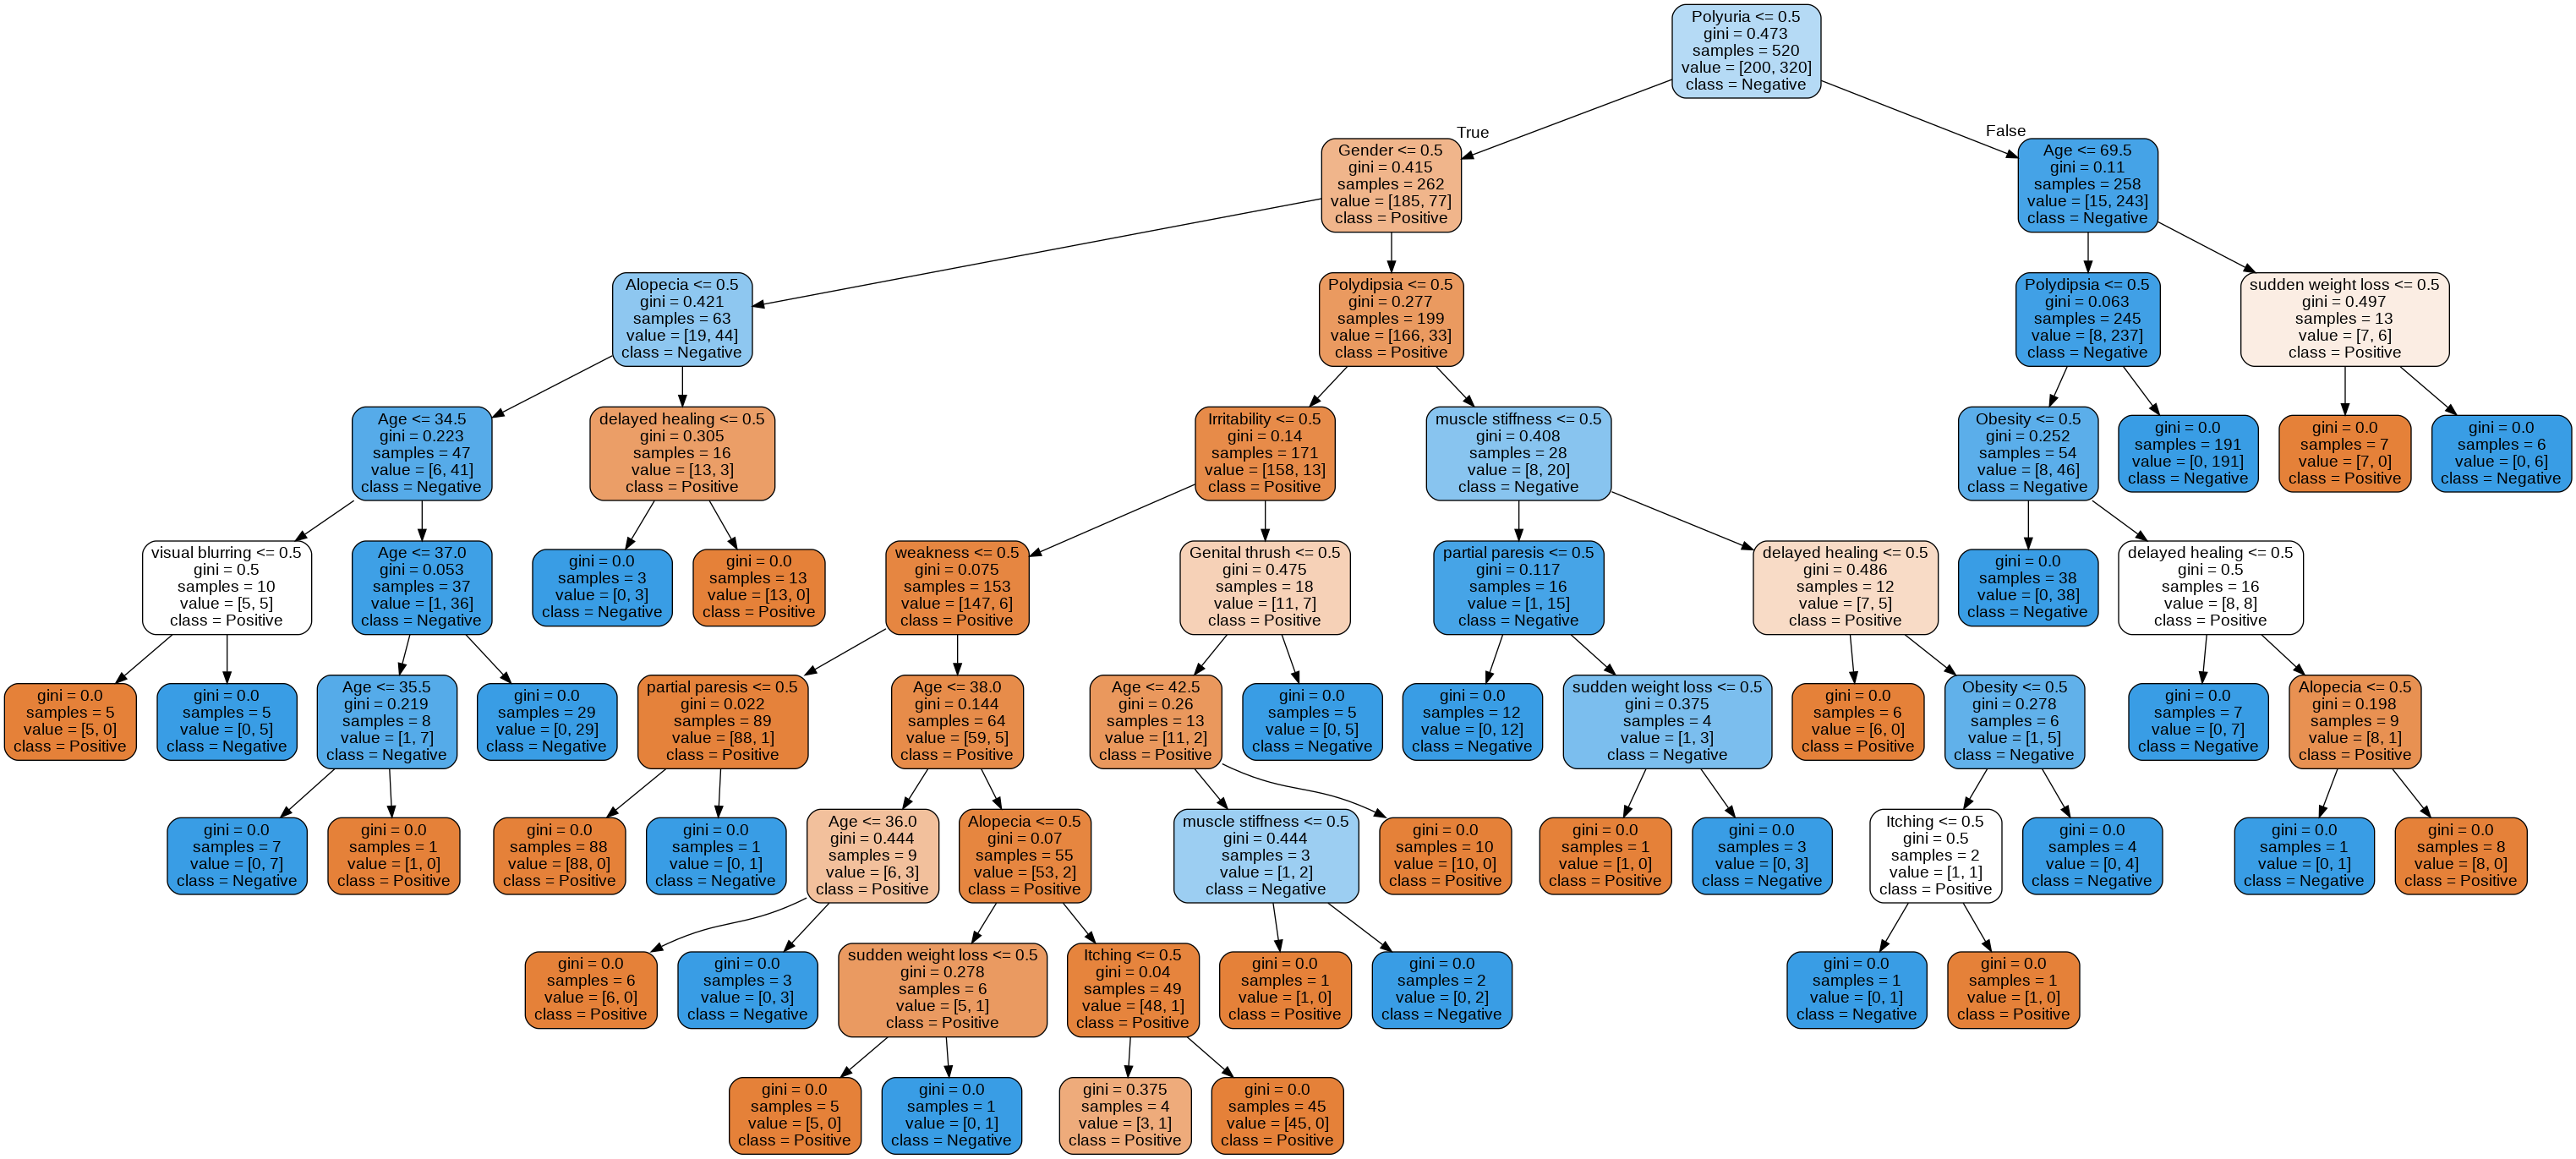

In [16]:
dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(x.columns.values),
    class_names = ['Positive', 'Negative'],
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Model Testing

In [17]:
tree_model.predict([[20, 	0, 	0, 	1, 	1, 	1, 	1, 	0, 	1, 	1, 	1, 	1, 	1, 	1, 	1, 	1],
                    [40, 	1, 	0, 	1, 	1, 	1, 	1, 	0, 	1, 	1, 	0, 	1, 	0, 	1, 	1, 	1]])

array([0, 1])